#Qiskit ve çizim için gerekli kütüphaneleri yükleme

In [28]:
!pip install qiskit[visualization] qiskit-aer

# Adım 1: Qiskit ile kuantum devre nesnesi yaratma

In [29]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2,2)

### **Bu kod, 2 kübit ve 2 klasik bitten oluşan boş bir kuantum devresi oluşturur.**



*   2 Kübit: Kuantum işlemlerinin (süperpozisyon, dolanıklık) yapılacağı ana   işlem birimleridir.
*   2 Klasik Bit: Deneyin sonunda kübitler ölçüldüğünde ortaya çıkan 0 veya 1 sonucunu kaydetmek için kullanılan hafıza alanlarıdır.





# Adım 2: İlk kübiti Hadamard kapısı ile süperpozisyona alma

In [30]:
circuit.h(0)

### **Bu kod, 0. kübite bir Hadamard (H) kapısı uygular.**

Bu işlem, başlangıçta 0 olan durgun bir kübiti, havada dönen bir madeni paraya çevirmek gibidir. Artık kübit, ölçülene kadar hem 0 hem de 1 olma potansiyelini eşit şekilde taşır. Bu belirsizlik durumuna süperpozisyon denir.

# Adım 3: Dolanıklık Yaratma (CNOT Kapısı)

In [20]:
circuit.cx(0,1)

### **Burada cx (Controlled-NOT veya CNOT) kapısı ile iki kübit arasında bir dolanıklık bağı kurarız.**



*   0 (Kontrol Kübiti): Bu, bizim süperpozisyona soktuğumuz ilk kübittir.
*   1 (Hedef Kübiti): Bu, kontrol kübitinin durumuna göre değişecek olan ikinci kübittir.

# Adım 4:  Sonucu Okuma (Ölçüm):

In [21]:
circuit.measure([0,1],[0,1])

*   [0,1] (ilk parametre): Hangi kübitlerin ölçüleceğini belirtir. Burada hem 0. kübiti hem de 1. kübiti ölçüyoruz.
*   [0,1] (ilk parametre): Hangi kübitlerin ölçüleceğini belirtir. Burada hem 0. kübiti hem de 1. kübiti ölçüyoruz.
   
           *   0. kübitin sonucu → 0. klasik bite yazılır.
           *   1. kübitin sonucu → 1. klasik bite yazılır.



Bu işlem, kuantum durumunu "çökertir". Yani, tüm belirsizlik ortadan kalkar ve kübitler ya 0 ya da 1 olarak kesin bir değer alır. Bu değerler, daha sonra analiz edeceğimiz sonuçları saklamak için klasik bitlere kaydedilir.

# Deneyi Gerçekleştirme (Simülasyon)

In [26]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
job = simulator.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

* AerSimulator() ile ideal bir kuantum bilgisayar simülatörü oluştururuz.

* simulator.run(circuit, shots=1024) komutuyla devremizi bu simülatöre gönderir ve deneyi 1024 kez tekrarlamasını söyleriz.

* Son olarak, result.get_counts() ile 1024 denemenin sonunda hangi sonucun (00 veya 11 gibi) kaç kez çıktığını özetleyen sayımları alırız.

# Sonuçları Görselleştirme


Ölçüm Sonuçları (1024 deneme): {'11': 517, '00': 507}


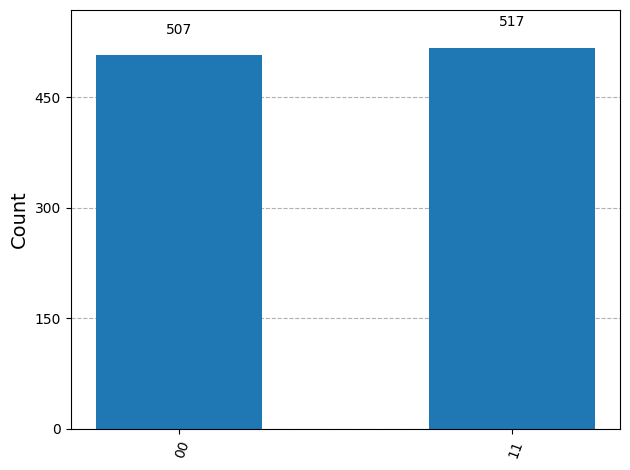

In [27]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

print("\nÖlçüm Sonuçları (1024 deneme):", counts)

plot_histogram(counts)